# 数据分析

In [518]:
#satisfaction_level 的分析
import numpy as np
import pandas as pd

df = pd.read_csv("HR.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [519]:
#先提取出该列数据
sl_s = df["satisfaction_level"]
# 先看看有没有异常值NaN
print(sl_s[sl_s.isnull()])
#看一下改行所有数据
print(df[df['satisfaction_level'].isnull()])
#没有异常值，所以为空
#丢弃异常值
sl_s = sl_s.dropna()

sl_s.mean()     #均值
sl_s.std()      #标准差
sl_s.quantile(q=0.25)    #下四分位数
sl_s.skew()     #偏度
sl_s.kurt()     #峰度

#获取离散化分布
print(np.histogram(sl_s.values,bins=np.arange(0.0,1.1,0.1))) #y的纵坐标表示出现的次顺
#输出：(array([ 195, 1214,  532,  974, 1668, 2146, 1973, 2074, 2220, 2004]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

Series([], Name: satisfaction_level, dtype: float64)
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary]
Index: []
(array([ 195, 1214,  532,  974, 1668, 2146, 1972, 2074, 2220, 2004],
      dtype=int64), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


In [535]:
#number_project 的分析
#静态结构分析
#先提取出该列数据
np_s = df["number_project"]
print(np_s.describe())
print("偏度\t",np_s.skew(),"峰度\t",np_s.kurt())

#计算样本出现次数
print(np_s.value_counts())
#获得构成、比例
print(np_s.value_counts(normalize=True))
#排序
print(np_s.value_counts(normalize=True).sort_index())
#简单对比分析操作
#先剔除异常值
#剔除空值 axis=0表示行，1表示列， how=any表示任意为空
df = df.dropna(axis=0,how="any")
df = df[df["last_evaluation"]<=1][df["salary"]!="nme"][df["sales"]!="sale"]

#以部门为单位进行简单对比分析
print(df.groupby("sales").mean())
print("_________________________________")

#单独拉出某一列来分析
print(df.loc[:,["last_evaluation","sales"]].groupby("sales").mean())
#自己定义函数进行对比, 计算极差
print("_________________________________")

import math
print(df.loc[:,["average_montly_hours","sales"]].groupby("sales")["average_montly_hours"].apply(lambda x:x.max()-x.min()))

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64
偏度	 0.3377056123598222 峰度	 -0.4954779519008947
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
4    0.291019
3    0.270351
5    0.184079
2    0.159211
6    0.078272
7    0.017068
Name: number_project, dtype: float64
2    0.159211
3    0.270351
4    0.291019
5    0.184079
6    0.078272
7    0.017068
Name: number_project, dtype: float64
             satisfaction_level  last_evaluation  number_project  \
sales                                                              
IT                     0.618142         0.716830        3.816626   
RandD                  0.619822         0.712122        3.853875   
accounting             0.582151         0.717718        3.825293   
hr                     0.598809         0.708850        3.65493

# 可视化分析

In [37]:
 #柱状图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


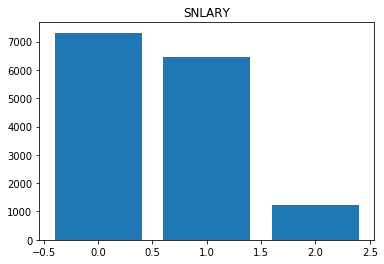

In [38]:
plt.bar(np.arange(len(df["salary"].value_counts())),df["salary"].value_counts())
plt.title('SNLARY')

plt.show()

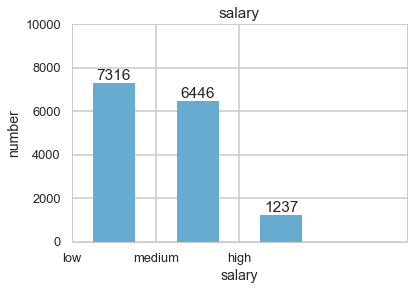

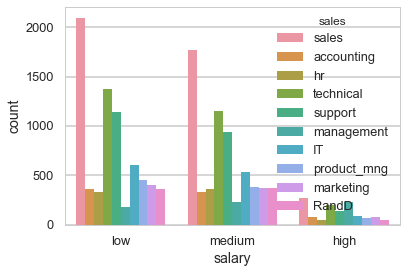

In [527]:
# 设置样式
sns.set_style(style='whitegrid') # 背景
sns.set_context(context='poster', font_scale=0.8) # 文本大小
#sns.set_palette('summer')# 色系
sns.set_palette([sns.color_palette('RdBu', n_colors=7)[5]])
# 柱状图
# plt
plt.title('salary')
plt.xlabel('salary')
plt.ylabel('number')
# 标注
plt.xticks(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts().index)
# xmin,xmax,ymin,ymax
plt.axis([0,4,0,10000])
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts(), width=0.5)
# 添加值标记
for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va='bottom')
plt.show()
# sns
sns.countplot(x='salary', hue='sales', data=df)

D:\anacondainstall\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


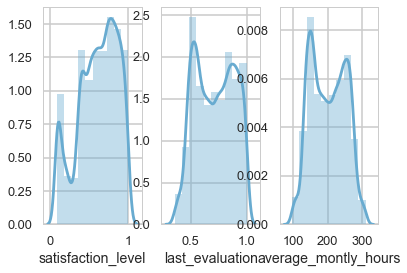

In [529]:
# 直方图
f = plt.figure()
f.add_subplot(1,3,1) # 一行三列
sns.distplot(df['satisfaction_level'], bins=10)# kde和hist控制曲线和直方
f.add_subplot(1,3,2)
sns.distplot(df['last_evaluation'], bins=10)
f.add_subplot(1,3,3)
sns.distplot(df['average_montly_hours'], bins=10)
plt.show()

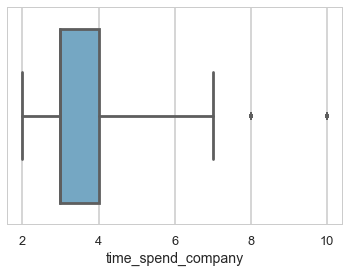

In [530]:
# 箱线图
sns.boxplot(x=df['time_spend_company'], saturation=0.75, whis=3) # whis控制k
plt.show()

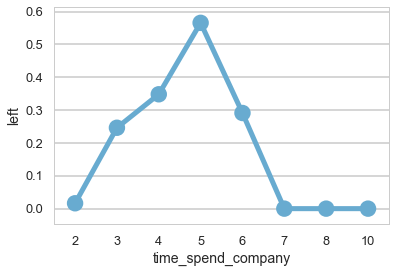

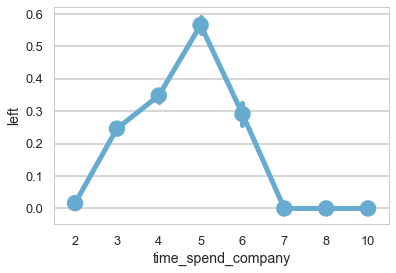

In [531]:
# 折线图
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index, sub_df['left'])
plt.show()
sns.pointplot(x='time_spend_company', y='left', data=df)

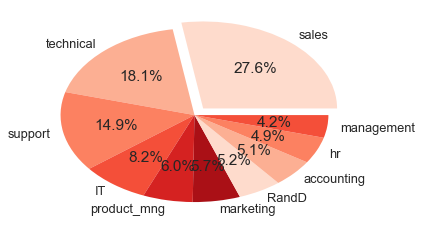

In [534]:
# 饼图
lbs = df['sales'].value_counts().index
explodes = [0.1 if i == 'sales' else 0 for i in lbs] # 突出强调
plt.pie(df['sales'].value_counts(normalize=True), explode=explodes, labels=lbs, autopct='%1.1f%%', colors=sns.color_palette('Reds'))
plt.show()

# 数据的获取和探索性分析--多因子

In [2]:
import numpy as np
import scipy.stats as ss


In [3]:
norm_dist=ss.norm.rvs(size=20)

In [4]:
norm_dist

array([-0.16263579,  0.59737839,  0.14882519,  1.33425451, -0.30757446,
       -0.91603357, -0.56405534,  1.11167226,  0.13182261,  0.39308801,
       -1.26540914,  0.48212311, -0.46004997,  0.4171423 ,  2.15818691,
        0.78800868,  1.07087491,  0.68960504,  0.24516572,  1.04450826])

In [5]:
ss.normaltest(norm_dist)

NormaltestResult(statistic=0.21812534694399277, pvalue=0.8966742180506517)

卡方检验

In [7]:
ss.chi2_contingency([[15,95],[85,5]])#男女化妆的例子

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

独立t分布检验

In [8]:
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))#即p值偏小，所以两者符合原假设(两个正态分布)

Ttest_indResult(statistic=0.3794420587956506, pvalue=0.7072222193704272)

方差检验

In [10]:
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])#电池的例子

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

相关系数

In [13]:
import pandas as pd

In [15]:
s1=pd.Series([11,23,433,5,67,343,52])
s2=pd.Series([45,45,34,545,656,34,34])

In [16]:
s1.corr(s2)

-0.3729434911354079

In [18]:
s1.corr(s2,method="spearman")

-0.5426488617097118

线性回归

In [541]:
x=np.arange(10).astype(np.float).reshape((10,1))

In [542]:
y=x*3+4*np.random.random((10,1))

In [543]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [544]:
y

array([[ 3.52490077],
       [ 6.31963902],
       [ 6.30995512],
       [11.37857349],
       [13.11594833],
       [17.5497295 ],
       [18.98424342],
       [21.24451027],
       [25.30623691],
       [27.38960587]])

In [545]:
from sklearn.linear_model import LinearRegression

In [546]:
reg=LinearRegression()

In [547]:
res=reg.fit(x,y)

In [548]:
y_pred=res.predict(x)

In [549]:
y_pred

array([[ 2.85018615],
       [ 5.57510795],
       [ 8.30002976],
       [11.02495156],
       [13.74987337],
       [16.47479517],
       [19.19971698],
       [21.92463878],
       [24.64956059],
       [27.37448239]])

In [550]:
res.coef_#参数
res.intercept_#截距

array([2.85018615])

# 主成分分析（PCA）

In [2]:

import numpy as np
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
print(daata)
#注：sklearn里用PCA的是奇异值分解
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
print("降维后信息量：",lower_dim.explained_variance_ratio_,"\n转换后： ",lower_dim.fit_transform(data))

[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]
降维后信息量： [0.96318131] 
转换后：  [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


# 复合分析

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)
['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
[[ 1.         -1.         -1.         -1.         -1.          0.45049248
   0.8699759   0.10603064  0.08079527 -1.        ]
 [-1.          1.         -1.         -1.          0.62589651 -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.          1.          0.28014632 -1.          0.17267179
  -1.          0.2153416   0.35115835  0.58712105]
 [-1.         -1.          0.28014632  1.         -1.         -1.
  -1.         -1.         -1.          0.05777944]
 [-1.          0.62589651 -1.         -1.          1.         -1.
  -1.         -1.         -1.         -1.        ]
 [ 0.45049248 -1.          0.17267179 -1.         -1.          1.
   0.39331946  0.60491791  0.47370349  0.24747714]
 [ 0.8699759  -1.         -1.         -1.         -1.          0.39331946
   1.          0.105566

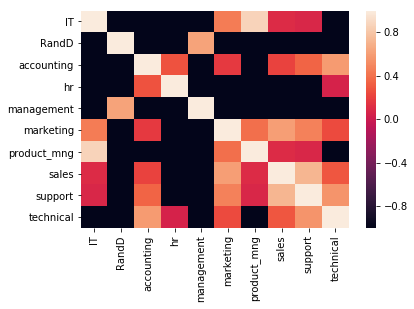

In [11]:
#实例：查看各个部门离职率之间是否有明显差异
#使用独立t检验方法，两两间求t检验统计量并求出p值,得到各个部门离职的分布

import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HR.csv")
dp_indices = df.groupby(by="sales").indices    #按部门分组，用indices得到索引
# print(dp_indices)
sales_values = df["left"].iloc[dp_indices["sales"]].values
#取出“left”中sales中的值
technical_values = df["left"].iloc[dp_indices["technical"]].values

print(ss.ttest_ind(sales_values,technical_values))  #打印p统计量
#两两求p值,热力图
dp_keys = list(dp_indices.keys()) #取出indices的keys//python3
print(dp_keys)
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])    #初始化矩阵
for i in range(len(dp_keys)):
   for j in range(len(dp_keys)):
       p_value = ss.ttest_ind(df["left"].iloc[dp_indices[dp_keys[i]]].values,\
                              df["left"].iloc[dp_indices[dp_keys[j]]].values)[1]
       if p_value<0.05:
           dp_t_mat[i][j]=-1
       else:
           dp_t_mat[i][j] = p_value
    
print(dp_t_mat)
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)
plt.show()

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256


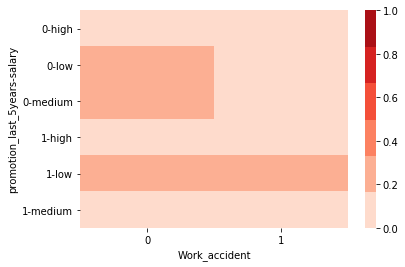

In [6]:
#透视表
piv_tb = pd.pivot_table(df,values="left",index=["promotion_last_5years","salary"],columns=["Work_accident"],aggfunc=np.mean)
print(piv_tb)
sns.heatmap(piv_tb,vmin=0,vmax=1,cmap=sns.color_palette("Reds"))
plt.show()

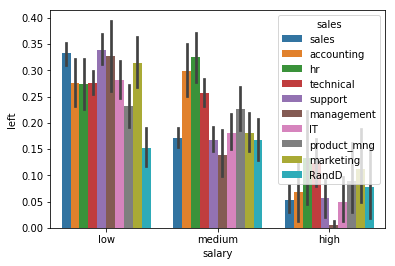

In [15]:
#实例：分组分析
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(font_scale=1.5)
df = pd.read_csv("HR.csv")
#离散值：
#设置hue向下根据部门钻取
sns.barplot(x="salary",y="left",hue="sales",data=df)
plt.show()


In [ ]:
#连续值
sl_s = df["satisfaction_level"]
sns.barplot(list(range(len(sl_s))),sl_s.sort_values())
plt.show()

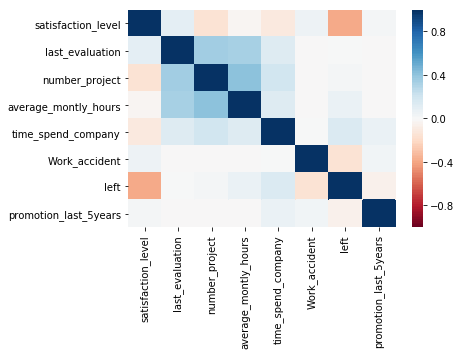

In [2]:
#实例：相关分析
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_context(font_scale=1.5)
df = pd.read_csv("HR.csv")

#计算相关技术，画相关图（会自动去除离散属性）
sns.heatmap(df.corr(),vmax=1,vmin=-1,cmap=sns.color_palette("RdBu",n_colors=128))
plt.show()

In [4]:
#离散情况下：
import numpy as np
#Gini
def getGini(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return 1 - sum([getProbSS(d[k]) * len(d[k]) / float(len(a1)) for k in d])
#可能性平方和
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(pd.groupby(s, by=s).count().values / float(len(s)))
    return sum(prt_ary ** 2)
#熵
def getEntropy(s):
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
        #计算其的分布
    prt_ary = np.array(pd.groupby(s, by=s).count().values / float(len(s)))#（得到概率分布）
    return -(np.log2(prt_ary) * prt_ary).sum()
#条件熵
def getCondEntropy(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(a1)) for k in d])
#熵增益
def getEntropyGain(a1, a2):
    return getEntropy(a2) - getCondEntropy(a1, a2)
#熵增益率
def getEntropyGainRatio(a1, a2):
    return getEntropyGain(a1, a2) / getEntropy(a2)
#相关度
def getDiscreteRelation(a1, a2):
    return getEntropyGain(a1, a2) / math.sqrt(getEntropy(a1) * getEntropy(a2))


#离散相关性度量
s1 = pd.Series(["X1", "X1", "X2", "X2", "X2", "X2"])
s2 = pd.Series(["Y1", "Y1", "Y1", "Y2", "Y2", "Y2"])
print(getEntropy(s1))
print(getEntropy(s2))


print(getCondEntropy(s1, s2))
print(getCondEntropy(s2, s1))
print(getEntropyGain(s1, s2))
print(getEntropyGain(s2, s1))
print(getEntropyGainRatio(s1, s2))
print(getEntropyGainRatio(s2, s1))
print(getDiscreteRelation(s1, s2))
print(getDiscreteRelation(s2, s1))

0.9182958340544896
1.0
0.5408520829727552
0.4591479170272448
0.4591479170272448
0.4591479170272448
0.4591479170272448
0.5
0.4791387674918639
0.4791387674918639


D:\anacondainstall\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods


In [2]:
import pandas as pd
import seaborn as sns
sns.set_context(font_scale=1.5)
df=pd.read_csv("HR.csv")
from sklearn.decomposition import PCA
my_pca=PCA(n_components=7)
my_pca.fit_transform(df.drop(labels=["salary","sales","left"],axis=1))
print("Ratio:",my_pca.explained_variance_ratio_)


Ratio: [9.98565340e-01 8.69246970e-04 4.73865973e-04 4.96932182e-05
 2.43172315e-05 9.29496619e-06 8.24128218e-06]


# 数据建模与挖掘 

# 数据清洗

In [3]:
#特征中异常值（空值）的处理和转换，数据清洗
#异常的查询和识别
#pandas：isnull（）/duplicated（）
#异常值（空值的丢弃）
#pandas ：drop()/dropna()/drop_duplicated()
#异常值的处理，用中值或者其他值替代原值，边界值的取代
# pandas：fillna（）

import numpy as np
import pandas as pd
df=pd.DataFrame({"A":["a0","a1","a1","a2","a3","a4"],"B":["b0","b1","b2","b2","b3",None],
                 "C":[1,2,None,3,4,5],"D":[0.1,10.2,11.4,8.9,9.1,12],
                 "E":[10,19,32,25,8,None],"F":["f0","g1","f2","f3","f4","f5"]})


In [4]:
df

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [5]:
#识别空值
df.isnull()

,A,B,C,D,E,F
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,True,False,False,True,False


In [6]:
df.dropna()#删除空值所在行

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4


In [7]:
df.dropna(subset=["B"])#删除B属性的空值的行，保留C属性的空值

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4


In [8]:
df.duplicated(["A"])#查找A属性的重复值，

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [12]:
df.duplicated(["A","B"])#联合A/B属性

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [14]:
df.drop_duplicates(["A"])#删除A属性重复的行

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [16]:
df.drop_duplicates(["A"],keep=False)#删除A属性重复的行，keep保留哪个重复行（False‘first’，'last’）

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [17]:
df


,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [18]:
df.fillna("b*")#空值赋值为b*

,A,B,C,D,E,F
0,a0,b0,1,0.1,10,f0
1,a1,b1,2,10.2,19,g1
2,a1,b2,b*,11.4,32,f2
3,a2,b2,3,8.9,25,f3
4,a3,b3,4,9.1,8,f4
5,a4,b*,5,12.0,b*,f5


In [21]:
df.fillna(df["E"].mean())#空值赋值为E属性的均值

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,18.8,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,18.8,5.0,12.0,18.8,f5


In [22]:
df


,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [23]:
df["E"].interpolate()#插值，只针对Series

0    10.0
1    19.0
2    32.0
3    25.0
4     8.0
5     8.0
Name: E, dtype: float64

In [24]:
pd.Series([1,None,4,5,20]).interpolate()#复制为附近两值的平均值

0     1.0
1     2.5
2     4.0
3     5.0
4    20.0
dtype: float64

In [25]:
pd.Series([1,None,4,5,20]).interpolate(method="spline",order=3)#三次条样差值

0     1.00
1     6.25
2     4.00
3     5.00
4    20.00
dtype: float64

In [26]:
df


,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [27]:
#D0可能是异常值，四分维书来决定

In [28]:
upper=df["D"].quantile(0.75)#上分位数
lower=df["D"].quantile(0.25)#下分维数
q_int=upper-lower

In [29]:
k=1

In [30]:
df[df["D"]>lower-k*q_int][df["D"]<upper+k*q_int]#第一行被删除了

D:\anacondainstall\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,A,B,C,D,E,F
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [31]:
# 删除F1
df


,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
1,a1,b1,2.0,10.2,19.0,g1
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


In [33]:
#判断df[“F”]中的值，是否开头为“f‘
df[[True if item.startswith("f") else False for item in list(df["F"].values)]]

,A,B,C,D,E,F
0,a0,b0,1.0,0.1,10.0,f0
2,a1,b2,NaN,11.4,32.0,f2
3,a2,b2,3.0,8.9,25.0,f3
4,a3,b3,4.0,9.1,8.0,f4
5,a4,None,5.0,12.0,NaN,f5


# 特征选择

In [34]:
####特征预处理，标注
# 特征选择
# 特征变换
# 对指化，离散化，数据平滑，归一化（标准化）、
# 数值降维
# 特征衍生

In [35]:
# 特征选择 剔除与标注不相关或者冗余的特征


In [46]:
import scipy.stats as ss
df=pd.DataFrame({"A":ss.norm.rvs(size=10),"B":ss.norm.rvs(size=10),
"C":ss.norm.rvs(size=10),"D":np.random.randint(low=0,high=2,size=10)})#随机选择（D为label）

In [47]:
df


,A,B,C,D
0,-0.589685,0.605356,0.933947,0
1,2.156238,2.058218,-0.430355,1
2,0.762866,-0.222717,1.311641,0
3,-1.798272,-0.078432,1.127526,1
4,1.220521,-0.968824,1.832401,1
5,-0.950548,-0.898886,1.350662,0
6,-1.000313,0.111857,0.530304,1
7,-0.339627,0.060072,-0.420410,1
8,0.032094,-0.885717,-1.269371,1
9,1.681239,-0.682203,1.147339,0


In [50]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [51]:
X=df.loc[:,["A","B","C"]]
Y=df.loc[:,"D"]

In [56]:
#过滤思想，包裹，嵌入思想
from sklearn.feature_selection import SelectKBest,RFE,SelectFromModel

In [67]:
skb=SelectKBest(k=2)#k=2保留两个特征

In [68]:
skb.fit(X,Y)#拟合一下
#说明sorce_func可以调用，可以查看sklearn官网的API

SelectKBest(k=2, score_func=<function f_classif at 0x000002652986A6A8>)

In [69]:
skb.transform(X)#A，C与D的相关性较好，所以B被干掉了

array([[ 0.60535573,  0.93394694],
       [ 2.05821807, -0.43035498],
       [-0.22271673,  1.31164118],
       [-0.07843217,  1.12752572],
       [-0.9688237 ,  1.83240109],
       [-0.898886  ,  1.35066193],
       [ 0.11185696,  0.53030373],
       [ 0.06007181, -0.42040994],
       [-0.88571669, -1.26937104],
       [-0.68220346,  1.14733946]])

In [64]:
rfe=RFE(estimator=SVR(kernel="linear"),n_features_to_select=2,step=1)#step为每次迭代，去除一个特征


In [66]:
rfe.fit_transform(X,Y)

array([[-0.58968476,  0.93394694],
       [ 2.15623819, -0.43035498],
       [ 0.76286584,  1.31164118],
       [-1.79827242,  1.12752572],
       [ 1.22052077,  1.83240109],
       [-0.95054753,  1.35066193],
       [-1.00031349,  0.53030373],
       [-0.33962666, -0.42040994],
       [ 0.03209351, -1.26937104],
       [ 1.68123929,  1.14733946]])

In [73]:
sfm=SelectFromModel(estimator=DecisionTreeRegressor(),threshold=0.5)

In [74]:

sfm.fit_transform(X,Y)

array([[ 0.93394694],
       [-0.43035498],
       [ 1.31164118],
       [ 1.12752572],
       [ 1.83240109],
       [ 1.35066193],
       [ 0.53030373],
       [-0.42040994],
       [-1.26937104],
       [ 1.14733946]])

# 特征变换

In [86]:
#特征变换
# ---对指化，大于0的时候，数据会变大（概率--softmax）numpy.exp
# ---收入的数据，声音的强度（对数化，缩放在较小的数据内）numpy.log
# ---离散化，将连续变量分成几段（bins）
# 克服数据缺陷，连续的变量有噪声的影响等频
# 非线性的映射，自因变量优化


In [77]:
#分箱技术，（离散化）
lst=[6,8,10,15,16,24,25,40,67]

In [81]:
#等深分箱
pd.qcut(lst,q=3)
pd.qcut(lst,q=3,labels=["low","medium","high"])

[low, low, low, medium, medium, medium, high, high, high]
Categories (3, object): [low < medium < high]

In [85]:
#等宽分箱,即最大值减去最小值的差进行平分
pd.cut(lst,bins=3,labels=["low","medium","high"])

[low, low, low, low, low, low, low, medium, high]
Categories (3, object): [low < medium < high]

In [88]:
# 归一化   缩放带0~1之间
#标准化 z_score：
# 1 1 1 1  0 0 0 0 
# 1 1 1 1 -1 -1 -1 -1 

# 1 0 0 0 0 0 0 0 
# 2.64 -0.38 -0.38 -0.38 -0.38 -0.38 -0.38 -0.38 
#加强数据内重要的特征的对比差度

In [90]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [97]:
MinMaxScaler().fit_transform(np.array([1,4,10,15,21]).reshape(-1,1))

D:\anacondainstall\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.  ],
       [0.15],
       [0.45],
       [0.7 ],
       [1.  ]])

In [96]:
StandardScaler().fit_transform(np.array([1,1,1,1,0,0,0,0 ]).reshape(-1,1))

D:\anacondainstall\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

In [98]:
StandardScaler().fit_transform(np.array([1,0,0,0,0,0,0,0 ]).reshape(-1,1))

D:\anacondainstall\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 2.64575131],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447],
       [-0.37796447]])

In [ ]:
#数值化
# （定类数据，定序，定距，定比）
定序：数值化，（高-1，中，0，低，-1）
定类数据：One—Hot—encode
定距：归一化

In [100]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [104]:
LabelEncoder().fit_transform(np.array(["Low","Medium","Low","high"]).reshape(-1,1))

D:\anacondainstall\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 2], dtype=int64)

In [151]:
b_encoder=LabelEncoder()

In [152]:
b_tran_f=b_encoder.fit_transform(np.array(["Red","yellow","blue","Greeen"]))

In [149]:
oht_encoder=OneHotEncoder().fit(b_tran_f.reshape(-1,1))

In [153]:
#得到一个稀疏的矩阵
oht_encoder.transform(b_encoder.transform(np.array(["yellow","blue","Red","Greeen","Greeen"])).reshape(-1,1))

<5x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [157]:
oht_encoder.transform(b_encoder.transform(np.array(["yellow","blue","Red","Greeen","Greeen"])).reshape(-1,1)).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [159]:
#正规化
from sklearn.preprocessing import Normalizer

In [167]:
Normalizer().fit_transform(np.array([1,1,3,-1,2]).reshape(-1,1))#对行的正规化

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.]])

In [172]:
Normalizer(norm="l2").fit_transform(np.array([[1,1,3,-1,2]]))#对行的正规化"l1或者l1

array([[ 0.25,  0.25,  0.75, -0.25,  0.5 ]])

In [173]:
#特征降维
#LDA---线性判别分析
# 核心思想：投影变换后同一标注内距离竟可能小，不同标注间距离竟可能大

In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [175]:
X=np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

In [176]:
Y=np.array([1,1,1,2,2,2])

In [179]:
LinearDiscriminantAnalysis(n_components=1).fit_transform(X,Y)#降维降成一维

array([[-1.73205081],
       [-1.73205081],
       [-3.46410162],
       [ 1.73205081],
       [ 1.73205081],
       [ 3.46410162]])

In [180]:
clf=LinearDiscriminantAnalysis(n_components=1).fit(X,Y)#fisher 分类器

In [181]:
clf.predict([[0.8,1]])

array([2])

In [182]:
#特征衍生（发现的特征，不是很大）

# HR表的预处理

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import Normalizer

df = pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [185]:
#1得到标注---left
label=df["left"]
df = df.drop('left', axis=1)

In [186]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


In [187]:
label

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    1
14985    1
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [189]:
#2清洗数据（数据较少，不抽样操作）
df=df.dropna(subset=["satisfaction_level","last_evaluation"])

In [190]:
df=df[df["satisfaction_level"]<=1][df["salary"]!="nme"]

In [191]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


In [192]:
# 3.特征选择
#在探索性分析中可以看到，得出，根据相关系数，选择特征


In [193]:
#4特征处理
# satisfaction_level，在[0,1]中，但最小不是0
# 1，不采用
# 2，MinMaxScaler ，进行拉伸
# 3StandardScaler，标准化

#satisfaction_level
# last_evaluation
# number_project
# average_montly_hours
#time_spend_company
# Work_accident
# promotion_last_5years
# sales
# salary

#第一个属性 使用MinMaxScaler
#第二属性 使用StandardScaler
#第三属性：MinMaxScaler

In [206]:
column_lst=["satisfaction_level","last_evaluation","number_project"]

In [207]:
column_lst

['satisfaction_level', 'last_evaluation', 'number_project']

In [198]:
df[column_lst[0]]=\
            MinMaxScaler().fit_transform(df[column_lst[0]].values.reshape(-1,1)).reshape(1,-1)[0]

In [199]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,0.53,2,157,3,0,0,sales,low
1,0.780220,0.86,5,262,6,0,0,sales,medium
2,0.021978,0.88,7,272,4,0,0,sales,medium
3,0.692308,0.87,5,223,5,0,0,sales,low
4,0.307692,0.52,2,159,3,0,0,sales,low
5,0.351648,0.50,2,153,3,0,0,sales,low
6,0.010989,0.77,6,247,4,0,0,sales,low
7,0.912088,0.85,5,259,5,0,0,sales,low
8,0.879121,1.00,5,224,5,0,0,sales,low
9,0.362637,0.53,2,142,3,0,0,sales,low


In [204]:
df[column_lst[1]]=\
            StandardScaler().fit_transform(df[column_lst[1]].values.reshape(-1,1)).reshape(1,-1)[0]

In [205]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,-1.087275,2,157,3,0,0,sales,low
1,0.780220,0.840707,5,262,6,0,0,sales,medium
2,0.021978,0.957554,7,272,4,0,0,sales,medium
3,0.692308,0.899131,5,223,5,0,0,sales,low
4,0.307692,-1.145699,2,159,3,0,0,sales,low
5,0.351648,-1.262546,2,153,3,0,0,sales,low
6,0.010989,0.314894,6,247,4,0,0,sales,low
7,0.912088,0.782283,5,259,5,0,0,sales,low
8,0.879121,1.658639,5,224,5,0,0,sales,low
9,0.362637,-1.087275,2,142,3,0,0,sales,low


In [208]:
df[column_lst[2]]=\
            MinMaxScaler().fit_transform(df[column_lst[2]].values.reshape(-1,1)).reshape(1,-1)[0]

D:\anacondainstall\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [209]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,-1.087275,0.0,157,3,0,0,sales,low
1,0.780220,0.840707,0.6,262,6,0,0,sales,medium
2,0.021978,0.957554,1.0,272,4,0,0,sales,medium
3,0.692308,0.899131,0.6,223,5,0,0,sales,low
4,0.307692,-1.145699,0.0,159,3,0,0,sales,low
5,0.351648,-1.262546,0.0,153,3,0,0,sales,low
6,0.010989,0.314894,0.8,247,4,0,0,sales,low
7,0.912088,0.782283,0.6,259,5,0,0,sales,low
8,0.879121,1.658639,0.6,224,5,0,0,sales,low
9,0.362637,-1.087275,0.0,142,3,0,0,sales,low


In [210]:
#satisfaction_level
# last_evaluation
# number_project
# average_montly_hours
#time_spend_company
# Work_accident
# promotion_last_5years
# department
# salary


#average_montly_hours整数，并且覆盖的范围较大
# 可以进行离散化，这里不进行离散化
##time_spend_company
# Work_accident
# promotion_last_5years
# 都可以进行类似属性1，2，3的操作

In [211]:
# department
# salary
# 离散值进行标签化
#LabelEncoder or OneHotEncoder

In [226]:
column_2list=["sales","salary"]

In [227]:
column_2list

['sales', 'salary']

In [228]:
df[column_2list[0]]=LabelEncoder().fit_transform(df[column_2list[0]].values.reshape(-1,1)).reshape(1,-1)[0]

D:\anacondainstall\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [229]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,-1.087275,0.0,157,3,0,0,7,0
1,0.780220,0.840707,0.6,262,6,0,0,7,0
2,0.021978,0.957554,1.0,272,4,0,0,7,0
3,0.692308,0.899131,0.6,223,5,0,0,7,0
4,0.307692,-1.145699,0.0,159,3,0,0,7,0
5,0.351648,-1.262546,0.0,153,3,0,0,7,0
6,0.010989,0.314894,0.8,247,4,0,0,7,0
7,0.912088,0.782283,0.6,259,5,0,0,7,0
8,0.879121,1.658639,0.6,224,5,0,0,7,0
9,0.362637,-1.087275,0.0,142,3,0,0,7,0


In [220]:
#
df[column_2list[1]]=LabelEncoder().fit_transform(df[column_2list[1]].values.reshape(-1,1)).reshape(1,-1)[0]

D:\anacondainstall\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,-1.087275,0.0,157,3,0,0,7,1
1,0.780220,0.840707,0.6,262,6,0,0,7,2
2,0.021978,0.957554,1.0,272,4,0,0,7,2
3,0.692308,0.899131,0.6,223,5,0,0,7,1
4,0.307692,-1.145699,0.0,159,3,0,0,7,1
5,0.351648,-1.262546,0.0,153,3,0,0,7,1
6,0.010989,0.314894,0.8,247,4,0,0,7,1
7,0.912088,0.782283,0.6,259,5,0,0,7,1
8,0.879121,1.658639,0.6,224,5,0,0,7,1
9,0.362637,-1.087275,0.0,142,3,0,0,7,1


In [222]:
#由于LabelEncoder对salary排序时，会对字母的手之目进行升序
所以上面low为1.high为0
d=dict([("low",0),("medium",1),("high",2)])
def map_salary(s):
    return d.get(s,0)
df[column_2list[1]]=[map_salary(s) for s in df["salary"].values]

In [223]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,-1.087275,0.0,157,3,0,0,7,0
1,0.780220,0.840707,0.6,262,6,0,0,7,0
2,0.021978,0.957554,1.0,272,4,0,0,7,0
3,0.692308,0.899131,0.6,223,5,0,0,7,0
4,0.307692,-1.145699,0.0,159,3,0,0,7,0
5,0.351648,-1.262546,0.0,153,3,0,0,7,0
6,0.010989,0.314894,0.8,247,4,0,0,7,0
7,0.912088,0.782283,0.6,259,5,0,0,7,0
8,0.879121,1.658639,0.6,224,5,0,0,7,0
9,0.362637,-1.087275,0.0,142,3,0,0,7,0


In [232]:
#OneHotEncoder,对sales进行LabelEncoder后，在进行OneHotEncoder
df=pd.get_dummies(df,columns=[column_2list[0]])

ValueError: labels ['sales'] not contained in axis

In [233]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_0,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9
0,0.318681,-1.087275,0.0,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.840707,0.6,262,6,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.021978,0.957554,1.0,272,4,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.692308,0.899131,0.6,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.307692,-1.145699,0.0,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.351648,-1.262546,0.0,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.010989,0.314894,0.8,247,4,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.912088,0.782283,0.6,259,5,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.879121,1.658639,0.6,224,5,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.362637,-1.087275,0.0,142,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [235]:
#判断是否降维
from sklearn.decomposition import PCA
#特征降维

In [238]:
df=PCA(n_components=3).fit_transform(df.values)

In [239]:
df

array([[-44.0589052 ,  -0.41116863,   0.78729382],
       [ 60.96322601,   2.309197  ,  -0.18329277],
       [ 70.9571284 ,   0.31354713,  -0.43415634],
       ...,
       [-58.05845406,  -0.36057462,   0.66822562],
       [ 78.95963691,   0.30869155,  -0.86409041],
       [-43.05933589,  -0.4339683 ,   0.8231582 ]])

In [240]:
label


0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    1
14985    1
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import Normalizer
#判断是否降维
from sklearn.decomposition import PCA
#特征降维

#sl:MinMaxScaler:False,StandardScaler：true
#le:MinMaxScaler:False,StandardScaler：true
# nup::MinMaxScaler:False,StandardScaler：true
#......
#.........

# sa：#LabelEncoder ：False OneHotEncoder：true
#sal:#LabelEncoder ：False OneHotEncoder：true
d=dict([("low",0),("medium",1),("high",2)])
def map_salary(s):
    return d.get(s,0)

def hr_processing(sl=False,le=False,nup= False,amh=False,tsc=False,wa=False,\
                  pl5=False,sa=False,sal=False,lower=False,id_n=3):
    new_df = pd.read_csv('HR.csv')
    #1清洗数据（数据较少，不抽样操作）
    new_df=new_df.dropna(subset=["satisfaction_level","last_evaluation"])
    new_df=new_df[new_df["satisfaction_level"]<=1][new_df["salary"]!="nme"]
    #2得到标注---left
    label=new_df["left"]
    new_df = new_df.drop('left', axis=1)
    #3特征变换
    column_lst=["satisfaction_level","last_evaluation","number_project",\
                "average_montly_hours","time_spend_company","Work_accident",\
                "promotion_last_5years"]
    scaler_1st=[sl,le,nup,amh,tsc,wa,pl5]

    for i in range(len(scaler_1st)):
        if not scaler_1st[i]:
            new_df[column_lst[i]]=\
            MinMaxScaler().fit_transform(new_df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else :
            new_df[column_lst[i]]=\
            StandardScaler().fit_transform(new_df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
    
    #数值化
    
    column_2list=["sales","salary"]
    scaler_2st=[sa,sal]

    for ii in range(len(scaler_2st)):
        if not scaler_2st[ii]:
            if column_2list[ii]=="salary":
                new_df[column_2list[ii ]]=[map_salary(s) for s in new_df["salary"].values]
            else:
                new_df[column_2list[ii]]=LabelEncoder().fit_transform(new_df[column_2list[ii]].\
                                                                      values.reshape(-1,1)).reshape(1,-1)[0]
                #归一化处理
            new_df[column_2list[ii]]=\
            MinMaxScaler().fit_transform(new_df[column_2list[ii]].values.reshape(-1,1)).reshape(1,-1)[0]
            
        else:
            new_df=pd.get_dummies(new_df,columns=[column_2list[ii]])
    if lower:#是否降维
        new_df=PCA(n_components=id_n).fit_transform(new_df.values)
    return new_df,label
    

features,labels=hr_processing(sa=False,lower=False)

D:\anacondainstall\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anacondainstall\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [372]:
features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.777778,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.777778,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.777778,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.777778,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.777778,0.0
5,0.351648,0.218750,0.0,0.266355,0.125,0.0,0.0,0.777778,0.0
6,0.010989,0.640625,0.8,0.705607,0.250,0.0,0.0,0.777778,0.0
7,0.912088,0.765625,0.6,0.761682,0.375,0.0,0.0,0.777778,0.0
8,0.879121,1.000000,0.6,0.598131,0.375,0.0,0.0,0.777778,0.0
9,0.362637,0.265625,0.0,0.214953,0.125,0.0,0.0,0.777778,0.0


In [373]:
label

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    1
14985    1
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# 机器学习与模型

In [374]:
#只能在dataframe，才能使用
def hr_modeling(features,labels):
    from sklearn.model_selection import train_test_split
    f_v=features.values
    l_v=labels.values
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v,l_v,test_size = 0.2)#训练集和验证集
    x_train,x_test,y_train,y_test = train_test_split(X_tt,Y_tt,test_size = 0.25)#
    print(len(x_train),len(y_test),len(Y_validation))
    
    return  x_train,x_test,y_train,y_test,X_validation,Y_validation
x_tra,x_tes,y_tra,y_tes,x_val,y_val=hr_modeling(features,labels)

8999 3000 3000


# 分类模型

In [380]:
# Knn判别模型
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
#NearestNeighbors直接获得点附近的点数
#官网查询n_neighbors可以修改
knn_cls=KNeighborsClassifier(n_neighbors=3)#n_neighbors可以修改

In [381]:
knn_cls.fit(x_tra,y_tra)#拟合数据

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [382]:
y_pre=knn_cls.predict(x_val)#
from sklearn.metrics import accuracy_score,recall_score,f1_score#加载评价的标准

In [383]:
print("Acc:",accuracy_score(y_val,y_pre))
print("Recall:",recall_score(y_val,y_pre))
print("F1_score:",f1_score(y_val,y_pre))



Acc: 0.948
Recall: 0.9376770538243626
F1_score: 0.8945945945945946


In [387]:
from sklearn.externals import joblib#保存模型
joblib.dump(knn_cls,"knn_cls")

['knn_cls']

In [390]:
knn_cls=joblib.load("knn_cls")#加载模型

y_pre2=knn_cls.predict(x_val)

print("Acc:",accuracy_score(y_val,y_pre2))
print("Recall:",recall_score(y_val,y_pre2))
print("F1_score:",f1_score(y_val,y_pre2))


Acc: 0.948
Recall: 0.9376770538243626
F1_score: 0.8945945945945946


In [440]:
#整合网络结构
from sklearn.metrics import accuracy_score,recall_score,f1_score#加载评价的标准
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=3)))
models.append(("GaussianNB",GaussianNB()))
models.append(("BernoulliNB",BernoulliNB()))
from sklearn.tree import DecisionTreeClassifier
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))
from sklearn.svm import SVC
models.append(("SVM classifier",SVC()))
from sklearn.ensemble import RandomForestClassifier
models.append(("RandForetClassifier",RandomForestClassifier()))
from sklearn.ensemble import AdaBoostClassifier
models.append(("AdaBoostClassifier",AdaBoostClassifier(n_estimators =1000,base_estimator=SVC(),algorithm='SAMME' )))
from sklearn.linear_model import LogisticRegression

models.append(("LogisticRegression",LogisticRegression(C=1000,tol=1e-10,)))
# C,指代与支持向量机一样，较小的值指定更强的正则化。
#tol：精度
#solver：指代用的什么方法
# max_iter:最大迭代次数
#由于该数据集是线性不可分的
from sklearn.ensemble import GradientBoostingClassifier
models.append(("GBTD",GradientBoostingClassifier(max_depth=6,n_estimators=100)))
#n_estimatorsx进行迭代的弱分类器的个数
for clf_name,clf in models:
    clf.fit(x_tra,y_tra)
    xy_lst=[(x_tra,y_tra),(x_tes,y_tes),(x_val,y_val)]
    for i in range(len(xy_lst)):
        X_part=xy_lst[i][0]
        y_part=xy_lst[i][1]
        Y_pred=clf.predict(X_part)
        print('............'+clf_name+'....'+str(i)+'..........')       
        print("Acc:",accuracy_score(y_part,Y_pred))
        print("Recall:",recall_score(y_part,Y_pred))
        print("F1_score:",f1_score(y_part,Y_pred))
    

............KNN....0..........
Acc: 0.9787754194910545
Recall: 0.9636948529411765
F1_score: 0.956442417331813
............KNN....1..........
Acc: 0.9553333333333334
Recall: 0.93033381712627
F1_score: 0.9053672316384181
............KNN....2..........
Acc: 0.948
Recall: 0.9376770538243626
F1_score: 0.8945945945945946
............GaussianNB....0..........
Acc: 0.7989776641849095
Recall: 0.7362132352941176
F1_score: 0.6391382405745063
............GaussianNB....1..........
Acc: 0.7946666666666666
Recall: 0.7111756168359942
F1_score: 0.6140350877192983
............GaussianNB....2..........
Acc: 0.786
Recall: 0.7294617563739377
F1_score: 0.6160287081339714
............BernoulliNB....0..........
Acc: 0.8427603067007445
Recall: 0.47702205882352944
F1_score: 0.594672013749642
............BernoulliNB....1..........
Acc: 0.8373333333333334
Recall: 0.42380261248185774
F1_score: 0.5447761194029851
............BernoulliNB....2..........
Acc: 0.8423333333333334
Recall: 0.49008498583569404
F1_score: 0.

D:\anacondainstall\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


............AdaBoostClassifier....1..........
Acc: 0.7703333333333333
Recall: 0.0
F1_score: 0.0
............AdaBoostClassifier....2..........
Acc: 0.7646666666666667
Recall: 0.0
F1_score: 0.0
............LogisticRegression....0..........
Acc: 0.7889765529503279
Recall: 0.359375
F1_score: 0.4516315333525845
............LogisticRegression....1..........
Acc: 0.7986666666666666
Recall: 0.3613933236574746
F1_score: 0.4519056261343013
............LogisticRegression....2..........
Acc: 0.7983333333333333
Recall: 0.3810198300283286
F1_score: 0.47069116360454943
............GBTD....0..........
Acc: 0.994332703633737
Recall: 0.9788602941176471
F1_score: 0.9881697981906751
............GBTD....1..........
Acc: 0.9866666666666667
Recall: 0.9550072568940493
F1_score: 0.9705014749262538
............GBTD....2..........
Acc: 0.986
Recall: 0.9546742209631728
F1_score: 0.9697841726618704


In [395]:
#朴素贝叶斯，生成模型，要求联合概率分布
from sklearn.naive_bayes import GaussianNB,BernoulliNB#高斯朴素贝叶斯(大多数是离散的)，伯路利朴素贝叶斯（二值，这个更好）
#特征必须是离散的
models.append(("GaussianNB",GaussianNB()))
models.append(("BernoulliNB",BernoulliNB()))


In [400]:
#决策树
from sklearn.tree import DecisionTreeClassifier
models.append(("DecisionTreeClassifier",DecisionTreeClassifier()))

In [403]:
#svm分类器
# 找出最近两个点离分界面最近，之间距离最大的两个点
from sklearn.svm import SVC
model.append(("SVM classifier",SVC(C=1000)))
#可以查看官网查看

In [411]:
#集成方法
# 组合多个模型，以获得更好的结果
# ---随机森林:
from sklearn.ensemble import RandomForestClassifier
models.append(("RandForetClassifier",RandomForestClassifier()))
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [413]:
#集成方法
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
models.append(("AdaBoostClassifier",AdaBoostClassifier()))
#默认弱分类器是决策树
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [505]:
#回归模型：Ridge岭回归回归：有序定序数据的分类）
def regr_tes(features,label):
#     print("X",features)
#     print("Y",label)
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    
    regr=Lasso(alpha=0.001)#lasso回归
    
#   regr=Ridge(alpha=0.5)#岭回归
#   regr=LinearRegression()#线性回归
    regr.fit(features.values,label.values)
    Y_pre=regr.predict(features.values)
    print("conf",regr.coef_)
    from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
    print("MSE",mean_squared_error(Y_pre,label.values))
    print("MAE",mean_absolute_error(label.values,Y_pre))
    print("R2",r2_score(label.values,Y_pre))
regr_tes(features[["number_project","average_montly_hours"]],features["last_evaluation"])

conf [0.26153935 0.25572149]
MSE 0.05956259739891546
MAE 0.20506719465294695
R2 0.1672555561165544


In [436]:
#罗吉斯特回归（逻辑回归）（回归：有序定序数据的分类）#非线性
from sklearn.linear_model import LogisticRegression
models.append(("LogisticRegression",LogisticRegression()))
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [438]:
#人工神经网络
from keras.layers.core import Dense,Activation
.............

ModuleNotFoundError: No module named 'keras'

In [439]:
#回归树和GBTD
from sklearn.ensemble import GradientBoostingClassifier
models.append(("GBTD",GradientBoostingClassifier()))
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# 无监督的学习--聚类

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(array([[0.50415247, 0.55278607],
       [0.48171368, 0.95194511],
       [0.27113113, 0.21000169],
       ...,
       [0.67660517, 0.06867743],
       [0.05660962, 0.96504031],
       [0.10610222, 0.15743002]]), None)


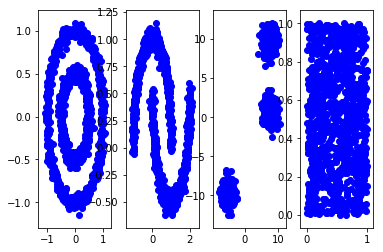

In [464]:
from sklearn.datasets import make_circles,make_blobs,make_moons
n_samples=1000
circle=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8)
random_data=np.random.rand(n_samples,2),None

print(random_data)
f=plt.figure()
# print(circle)
colors="bgrcmyk"
data=[circle,moons,blobs,random_data]
models=[("None",None)]
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
            f.add_subplot(len(models),len(data),inx*len(data)+i+1)
            [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

#数据集的形状


KMeans 0 0.38918353357379804
KMeans 1 0.4279218214804981
KMeans 2 0.8260921886020176
KMeans 3 0.381199609507512
DBSCAN 0 0.1145459300134317
DBSCAN 1 0.3354305494605702
DBSCAN 2 0.8260921886020176
Agglomerative 0 0.3513324845174509
Agglomerative 1 0.41533681377431764
Agglomerative 2 0.8260921886020176
Agglomerative 3 0.3057645483624013


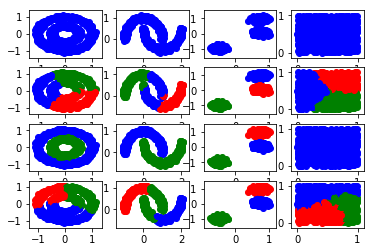

In [508]:
#K_means结果
from sklearn.datasets import make_circles,make_blobs,make_moons
#制作数据集
from sklearn.cluster import KMeans
n_samples=1000
circle=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=(0.1))

random_data=np.random.rand(n_samples,2),None
f=plt.figure()
# print(circle)
colors="bgrcmyk"
data=[circle,moons,blobs,random_data]
models=[("None",None),("KMeans",KMeans(n_clusters=3))]
from sklearn.cluster import DBSCAN
models.append(("DBSCAN",DBSCAN(min_samples=3,eps=0.2)))
#eps:E领域，min_samples最小的点集
from sklearn.cluster import AgglomerativeClustering
models.append(("Agglomerative",AgglomerativeClustering(n_clusters=3,linkage="ward")))
from sklearn.metrics import silhouette_score#引入轮廓系数

for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        try:
            print(clt_name,i,silhouette_score(X,clt_res))
        except:
            pass
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()
# https://scikit-learn.org/stable/datasets/index.html
#数据集的形状

In [466]:
#DBSCAN聚类算法
from sklearn.cluster import DBSCAN
models.append(("DBSCAN",DBSCAN(min_samples=3,eps=0.5)))

In [473]:
#层次聚类
from sklearn.cluster import AgglomerativeClustering
models.append(("Agglomerative",AgglomerativeClustering()))
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

# 无监督学习--关联规则

In [474]:
#关联规则
#序列模型

# 半监督学习


In [497]:
#标签传播
# https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import datasets
iris=datasets.load_iris()
labels=np.copy(iris.target)
random_unlabel=np.random.rand(len(iris.target))
random_unlabel=random_unlabel<0.3  #<0.3返回1，否则返回0

Y=labels[random_unlabel]
# print(Y)
# print("————————————————————————————")
labels[random_unlabel]=-1
# print(iris.target)
# print(labels)
# print(len(labels))
print("Unlabeled Number:",list(labels).count(-1))

from sklearn.semi_supervised import LabelPropagation
label_prop_model=LabelPropagation()
label_prop_model.fit(iris.data,labels)

Y_pred=label_prop_model.predict(iris.data)
Y_pred=Y_pred[random_unlabel]
from sklearn.metrics import accuracy_score,recall_score,f1_score#加载评价的标准
print("Acc:",accuracy_score(Y,Y_pred))
print("Recall:",recall_score(Y,Y_pred))
print("F1_score:",f1_score(Y,Y_pred))
# 这个问题的解决的方法：可以在https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
#  找到，修改在下行

Unlabeled Number: 49
Acc: 0.9795918367346939


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [502]:
#标签传播
# https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import datasets
iris=datasets.load_iris()
labels=np.copy(iris.target)
random_unlabel=np.random.rand(len(iris.target))
random_unlabel=random_unlabel<0.3  #<0.3返回1，否则返回0

Y=labels[random_unlabel]
# print(Y)
# print("————————————————————————————")
labels[random_unlabel]=-1
# print(iris.target)
# print(labels)
# print(len(labels))
print("Unlabeled Number:",list(labels).count(-1))

from sklearn.semi_supervised import LabelPropagation
label_prop_model=LabelPropagation()
label_prop_model.fit(iris.data,labels)

Y_pred=label_prop_model.predict(iris.data)
Y_pred=Y_pred[random_unlabel]
from sklearn.metrics import accuracy_score,recall_score,f1_score#加载评价的标准
print("Acc:",accuracy_score(Y,Y_pred))
print("Recall:",recall_score(Y,Y_pred,average='micro'))
print("F1_score:",f1_score(Y,Y_pred,average='micro'))

Unlabeled Number: 44
Acc: 0.9318181818181818
Recall: 0.9318181818181818
F1_score: 0.9318181818181818


In [503]:
#sklearn的网络
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
#评价指标
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics